<a href="https://colab.research.google.com/github/bodong408/Machine-Learning/blob/main/NLP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
X = iris_data.drop(['species'], axis=1)
y = pd.get_dummies(iris_data.species, prefix='output')
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
X = X.values
y = y.values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
def create_model_multiple_outs(learning_rate, dropout_rate):

    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1],  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(6,  activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    adam = Adam(lr=learning_rate)
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [8]:
dropout_rate = 0.1
epochs = 50
batch_size = 1
learn_rate = 0.001

In [9]:

model = create_model_multiple_outs(learn_rate, dropout_rate)

In [10]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, verbose=1)

Epoch 1/50
96/96 [==============================] - 0s 3ms/step - loss: 0.8184 - accuracy: 0.6250 - val_loss: 0.7139 - val_accuracy: 0.7500
Epoch 2/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6409 - accuracy: 0.6771 - val_loss: 0.6074 - val_accuracy: 0.7083
Epoch 3/50
96/96 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.6875 - val_loss: 0.5366 - val_accuracy: 0.7500
Epoch 4/50
96/96 [==============================] - 0s 1ms/step - loss: 0.5340 - accuracy: 0.7292 - val_loss: 0.4852 - val_accuracy: 0.8333
Epoch 5/50
96/96 [==============================] - 0s 1ms/step - loss: 0.5290 - accuracy: 0.7500 - val_loss: 0.4385 - val_accuracy: 0.9167
Epoch 6/50
96/96 [==============================] - 0s 1ms/step - loss: 0.4686 - accuracy: 0.8229 - val_loss: 0.3980 - val_accuracy: 0.9167
Epoch 7/50
96/96 [==============================] - 0s 1ms/step - loss: 0.4463 - accuracy: 0.8021 - val_loss: 0.3628 - val_accuracy: 0.9583
Epoch 8/50
96/96 [==

In [12]:
accuracies = model.evaluate(X_test, y_test, verbose=1)
print(accuracies)

[0.0555504634976387, 1.0]


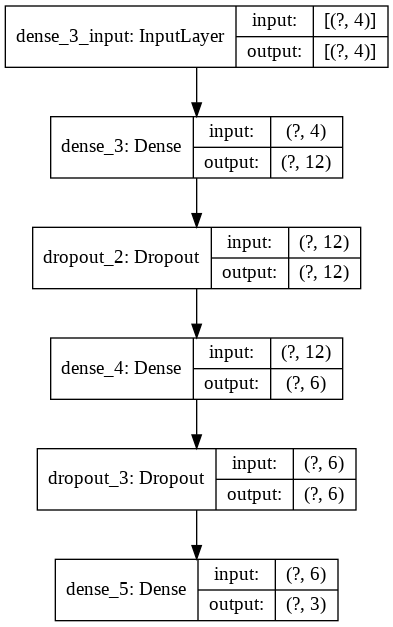

In [14]:
model = create_model_multiple_outs(learn_rate, dropout_rate)
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True)

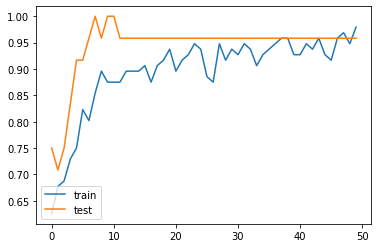

In [15]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')
plt.legend(['train','test'], loc='lower left')

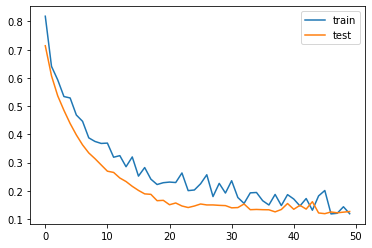

In [17]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')
plt.legend(['train','test'], loc='upper right')